Matplotlib is building the font cache; this may take a moment.


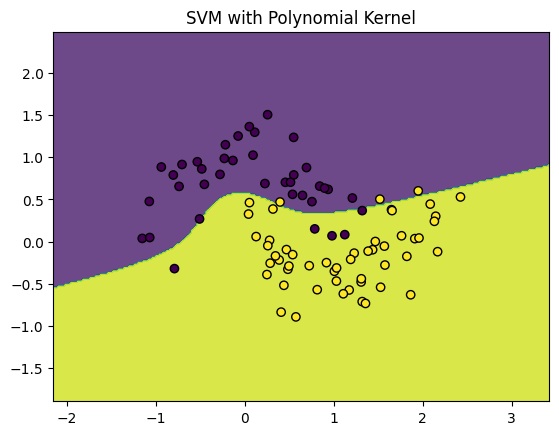

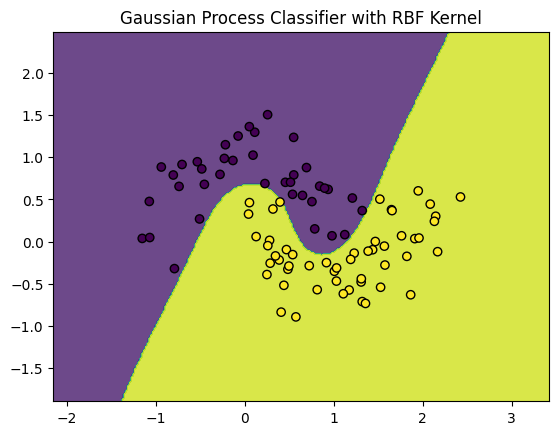

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Generate a synthetic dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)

# Gaussian Process Classifier with RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X_train, y_train)

# Display the decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_poly, X_test, y_test, "SVM with Polynomial Kernel")
plot_decision_boundary(gpc, X_test, y_test, "Gaussian Process Classifier with RBF Kernel")


In [6]:
import pandas as pd
sample = pd.read_csv("Sample1.csv")

In [2]:
df = pd.read_csv("./vector_field.csv")
df[['final_x', 'final_y']] = df['final_grid'].str.split(',', n=1, expand=True)
df = df.rename({"num_hops":"hops"},axis=1)

/var/folders/xr/kt3mj1zd5q301hfqvry58zt5q2b8fk/T/ipykernel_63101/3748811938.py:15: UserWarning: The palette list has more values (307) than needed (306), which may not be intended.
  scatter_plot = sns.scatterplot(data=data, x='grid_x', y='grid_y',  hue=color_key,palette=palette)


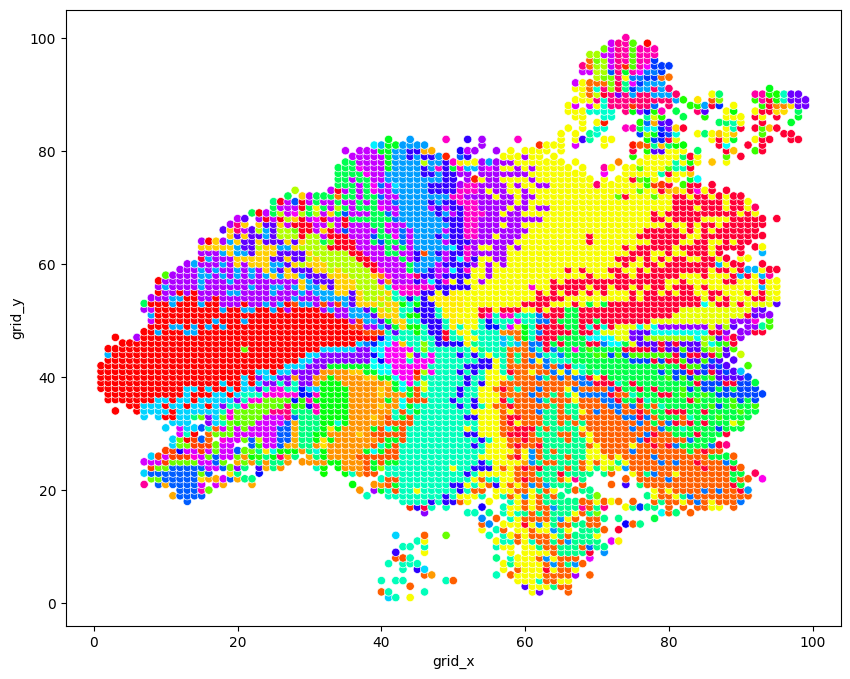

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

def plot_attractors(data, color_key="final_grid"):
    # Generating a color palette with as many colors as categories
    palette = sns.color_palette("hsv", len(data[color_key].unique()))

    # Randomly shuffle the palette
    random.shuffle(palette)

    # Creating the scatter plot
    plt.figure(figsize=(10, 8))
    scatter_plot = sns.scatterplot(data=data, x='grid_x', y='grid_y',  hue=color_key,palette=palette)
    scatter_plot.legend_.remove()

    plt.show()

plot_attractors(df)

In [9]:
sample

,Unnamed: 0,grid_x,grid_y,avg_vx,avg_vy,grid_id,final_grid,hops,status,result,final_x,final_y,label
0,68,7,25,0.318780,-0.099265,"7,25","26,33",13,Success,"26,33, 13, Success",26,33,0.0
1,87,8,22,0.341360,0.042345,"8,22","26,36",15,Success,"26,36, 15, Success",26,36,1.0
2,90,8,25,0.464667,0.040569,"8,25","26,33",12,Success,"26,33, 12, Success",26,33,0.0
3,116,9,22,0.526187,0.759713,"9,22","26,36",14,Success,"26,36, 14, Success",26,36,1.0
4,118,9,24,1.307873,0.310408,"9,24","26,36",13,Success,"26,36, 13, Success",26,36,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,808,25,35,0.562796,0.370982,"25,35","26,36",2,Success,"26,36, 2, Success",26,36,1.0
91,809,25,36,0.706610,0.186041,"25,36","26,36",2,Success,"26,36, 2, Success",26,36,1.0
92,853,26,32,0.165757,0.251372,"26,32","26,33",2,Success,"26,33, 2, Success",26,33,0.0
93,854,26,33,0.205891,-0.144262,"26,33","26,33",1,Success,"26,33, 1, Success",26,33,0.0


In [84]:
sample = pd.read_csv("Sample4.csv")

s = sample[["grid_x","grid_y",'label']]

In [85]:
s.label.value_counts()

label
0.0    108
1.0     49
Name: count, dtype: int64

In [86]:
merged = df.merge(s,how="left",on=['grid_x','grid_y'])


In [87]:
merged['label'] = merged['label'].fillna(2)
merged.label.value_counts()

label
2.0    5332
0.0     108
1.0      49
Name: count, dtype: int64

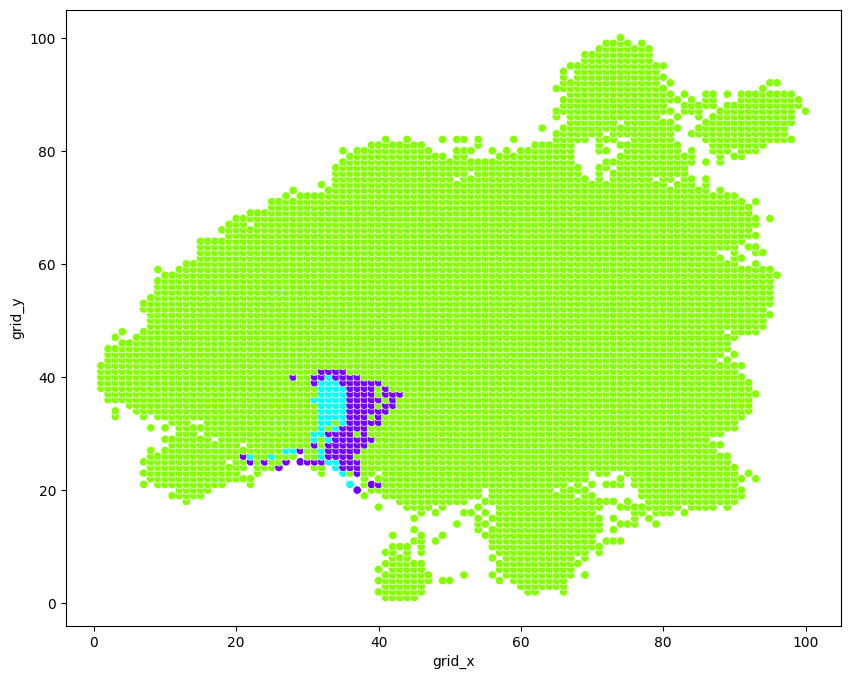

In [88]:
plot_attractors(merged,color_key="label")

In [49]:
from sklearn.metrics import f1_score

a = test.a.to_list()
b = test.b.to_list()

f1_score(a[0:5],b[0:5])

0.0

In [50]:
a[0:5]

[0, 0, 0, 0, 0]

In [51]:
b[0:5]

[0, 0, 0, 1, 0]

In [69]:
f1_score(b,a,labels=[0,1],average='weighted')

0.6320191158900836